In [161]:
import mido
import os
import string 
import matplotlib.pyplot as plt
import numpy as np

In [173]:
notes = {}

In [174]:
notes.get(1, [])

[]

In [175]:
notes[1] = notes.get(1, []) + [(5, 1)]

In [176]:
notes

{1: [(5, 1)]}

In [219]:
class MidiTranscriber():
    def __init__(self):
        pass
    

            

    def Sequence(self, track):
        result = []
        notes = {}
        time = 0
        
        for msg in track:
            time += msg.time
            
            if msg.type == 'note_on':
                if msg.velocity != 0:
                    past = notes.get(msg.note)
                    if(past == None):
                        past = []
                    notes[msg.note] = past + [time , 1] 
                    result.append([msg.note, msg.velocity,  msg.channel, msg.type])
                else:
                    pass
            if msg.type == 'note_off':
                past = notes.get(msg.note)
                if(past == None):
                    past = []
                notes[msg.note] = past + [time , 0]
                result.append([msg.note, msg.velocity ,  msg.channel, msg.type])
                
        return result
        
        
    def BuildArray(self,midi):
        Lenghth = [len(tr) for tr in midi.tracks]
        track_length = max(Lenghth)
        min_track =  track_length/10 #Only accept tracks 1/10 of length.
        all_arys = []
        for track in range(len(midi.tracks)):
            out = []
            valid_track = (len(midi.tracks[track]) > min_track)
            if(valid_track):
                print("track is valid")
                track = midi.tracks[track]
                res = self.Sequence(track)
                all_arys.append(res)
                break
            
        #sums = all_arys.sum(axis=1)
        #ends = np.where(sums > 0)[0]
        return all_arys
        return all_arys[min(ends): max(ends)]

        builder = []
        
        

In [220]:
scriber = MidiTranscriber()

In [221]:
def Parser(composer, path):
    midis = os.listdir(path)
    for file in midis:
        if(file == ".DS_Store"):
            continue 
        midis_path = path + "/" + file
        #print(midis_path)
        
        midi = mido.MidiFile(midis_path)
        print(len(midi.tracks[0]) + len(midi.tracks[1]) + len(midi.tracks[2]))
        #print(len(midi.tracks[0]))
        arr = scriber.BuildArray(midi)
        return arr
        break
        


In [222]:
dataset = "Composer_Dataset/NN_midi_files_extended/train"
composers = ['bach', 'bartok', 'byrd', 'chopin', 'handel', 'hummel', 'mendelssohn', 'mozart', 'schumann']


for composer in composers:
    path = dataset +"/"+ composer
    arr = Parser(composer, path)
    
    break
    
    



12990
track is valid


In [223]:
len(arr)

1

In [226]:
print(arr)

[[[45, 127, 10, 'note_on'], [49, 127, 1, 'note_on'], [49, 127, 1, 'note_off'], [52, 127, 4, 'note_on'], [45, 127, 10, 'note_off'], [52, 127, 4, 'note_off'], [57, 127, 10, 'note_on'], [57, 127, 10, 'note_off'], [56, 127, 8, 'note_on'], [56, 127, 8, 'note_off'], [54, 127, 6, 'note_on'], [54, 127, 6, 'note_off'], [52, 127, 4, 'note_on'], [56, 127, 8, 'note_on'], [56, 127, 8, 'note_off'], [59, 127, 12, 'note_on'], [59, 127, 12, 'note_off'], [62, 127, 2, 'note_on'], [52, 127, 4, 'note_off'], [62, 127, 2, 'note_off'], [61, 127, 1, 'note_on'], [61, 127, 1, 'note_off'], [59, 127, 12, 'note_on'], [59, 127, 12, 'note_off'], [57, 127, 10, 'note_on'], [61, 127, 1, 'note_on'], [61, 127, 1, 'note_off'], [64, 127, 4, 'note_on'], [64, 127, 4, 'note_off'], [69, 127, 10, 'note_on'], [57, 127, 10, 'note_off'], [69, 127, 10, 'note_off'], [68, 127, 8, 'note_on'], [68, 127, 8, 'note_off'], [66, 127, 6, 'note_on'], [66, 127, 6, 'note_off'], [64, 127, 4, 'note_on'], [68, 127, 8, 'note_on'], [68, 127, 8, 'note

TypeError: unhashable type: 'numpy.ndarray'

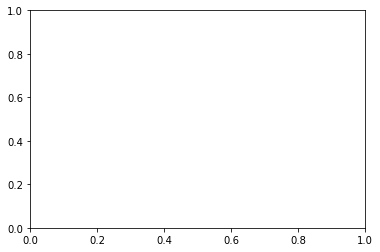

In [225]:
plt.plot(arr)
plt.show()